In [43]:
import pandas as pd
import pickle
import numpy as np
import cv2
import os
from imutils import paths
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten, Dense
import sklearn.metrics as metrics
from keras.models import load_model
import itertools
from matplotlib import pyplot as plt
%matplotlib inline

#  - Evaluating The First Model (v1)




In [44]:
LETTER_IMAGES_FOLDER = 'extracted_letter'
img =[]
labels = []
for image_file in paths.list_images(LETTER_IMAGES_FOLDER):
    image = cv2.imread(image_file,cv2.IMREAD_GRAYSCALE)
    
     # Adding a third channel dimension
    image = np.expand_dims(image, axis=2)
    
     # Grabbing the name of the letter 
    label = image_file.split(os.path.sep)[-2]
    
    # appending
    img.append(image)
    labels.append(label)
    
    
    


X = np.array(img)
y = np.array(labels)


# scale the raw pixel intensities to the range [0, 1] (this improves training)
X = np.array(X, dtype="float") / 255.0
y = np.array(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)


# Load up the model labels (so we can translate model predictions to actual letters)
with open('model_labels_v1.dat', "rb") as f:
    lb = pickle.load(f)
y_train = lb.transform(y_train)
y_test = lb.transform(y_test)




# Load the trained neural network
cnn_model = load_model('captcha_model_v1.hdf5')

In [45]:

y_pred = cnn_model.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_true=lb.inverse_transform(y_test), y_pred=lb.inverse_transform(y_pred))  # shape=(12, 12)

In [46]:
def graph_confusion_matrix(cm , classes):
    plt.figure(figsize=(15, 10))
    plt.imshow(cm, interpolation='nearest')
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), 
                 horizontalalignment="center", 
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 
    
    
    
    
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

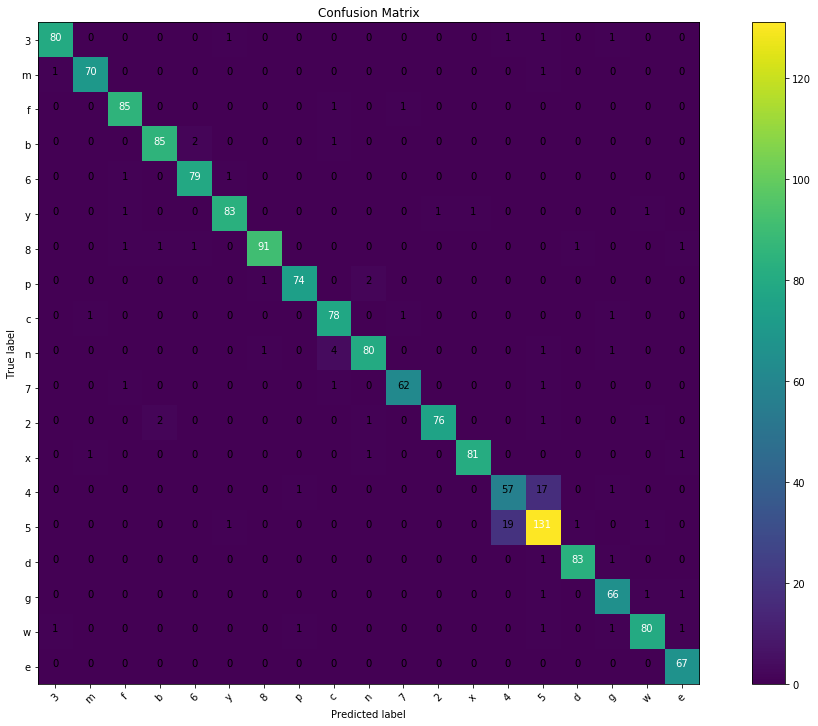

In [47]:
graph_confusion_matrix(confusion_matrix,set(y))

In [35]:
print(metrics.classification_report(lb.inverse_transform(y_test),lb.inverse_transform(y_pred)))

              precision    recall  f1-score   support

           2       0.98      0.95      0.96        84
           3       0.97      0.97      0.97        72
           4       0.96      0.98      0.97        87
           5       0.97      0.97      0.97        88
           6       0.96      0.98      0.97        81
           7       0.97      0.95      0.96        87
           8       0.98      0.95      0.96        96
           b       0.97      0.96      0.97        77
           c       0.92      0.96      0.94        81
           d       0.95      0.92      0.94        87
           e       0.97      0.95      0.96        65
           f       0.99      0.94      0.96        81
           g       0.99      0.96      0.98        84
           m       0.74      0.75      0.75        76
           n       0.84      0.86      0.85       153
           p       0.98      0.98      0.98        85
           w       0.92      0.96      0.94        69
           x       0.95    

In [36]:
accuracy(confusion_matrix)

0.9395638629283489




# - Evaluating The Second Model 2  (v2)




In [37]:
LETTER_IMAGES_FOLDER = 'extracted_letter_2'
img =[]
labels = []
for image_file in paths.list_images(LETTER_IMAGES_FOLDER):
    image = cv2.imread(image_file,cv2.IMREAD_GRAYSCALE)
    
     # Adding a third channel dimension
    image = np.expand_dims(image, axis=2)
    
     # Grabbing the name of the letter 
    label = image_file.split(os.path.sep)[-2]
    
    # appending
    img.append(image)
    labels.append(label)
    
    
    


X = np.array(img)
y = np.array(labels)


# scale the raw pixel intensities to the range [0, 1] (this improves training)
X = np.array(X, dtype="float") / 255.0
y = np.array(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)


# Load up the model labels (so we can translate model predictions to actual letters)
with open('model_labels_v2.dat', "rb") as f:
    lb = pickle.load(f)
y_train = lb.transform(y_train)
y_test = lb.transform(y_test)




# Load the trained neural network
cnn_model = load_model('captcha_model_v2.hdf5')

In [38]:

y_pred = cnn_model.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_true=lb.inverse_transform(y_test), y_pred=lb.inverse_transform(y_pred))  # shape=(12, 12)

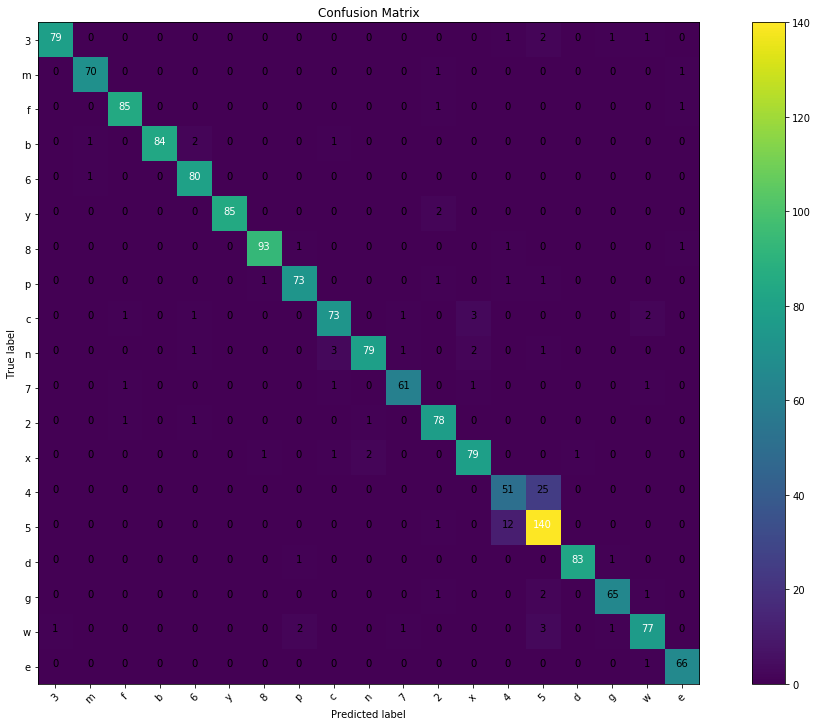

In [39]:
graph_confusion_matrix(confusion_matrix,set(y))

In [40]:
print(metrics.classification_report(lb.inverse_transform(y_test),lb.inverse_transform(y_pred)))

              precision    recall  f1-score   support

           2       0.99      0.94      0.96        84
           3       0.97      0.97      0.97        72
           4       0.97      0.98      0.97        87
           5       1.00      0.95      0.98        88
           6       0.94      0.99      0.96        81
           7       1.00      0.98      0.99        87
           8       0.98      0.97      0.97        96
           b       0.95      0.95      0.95        77
           c       0.92      0.90      0.91        81
           d       0.96      0.91      0.93        87
           e       0.95      0.94      0.95        65
           f       0.92      0.96      0.94        81
           g       0.93      0.94      0.93        84
           m       0.77      0.67      0.72        76
           n       0.80      0.92      0.86       153
           p       0.99      0.98      0.98        85
           w       0.96      0.94      0.95        69
           x       0.93    

In [41]:
accuracy(confusion_matrix)

0.935202492211838